# Using deep learning algorithm-Deep Belief Network(DBN) for image classification

## What is deep learning?

Deep learning is inspired by the functionality of human brain cells called artificial neural network.
Deep learning is one of machine learning algorithm that takes data in form of images, videos, text and connections between all the neurons are adjusted according to the pattern of the data

Deep learning is a sub field within machine learning used for learning multiple levels of representation in order to model complex connection between the data
Higher-level features are defined with the help of lower levels and such hierarchy of features is called deep architecture. If we draw a graph showing how these concepts are built over each other the graph is deep with many layers. Hence, we call this learning approach as deep learning


### Basic Requirements to run this notebook
This Python notebook shows you how to use deep learning to build a classification model that maps images of single digit numbers to their corresponding numeric representations.

This notebook is adapted from the deep learning tutorial that describes the important deep learning concepts and includes code snippets here.

<b>Important note </b> - This notebook needs python 2 to run the code since python 3 does not support the pacakage nolearn


## What is DBN?

# DBN-Deep Belief Network 



<b> Introduction to DBN </b>

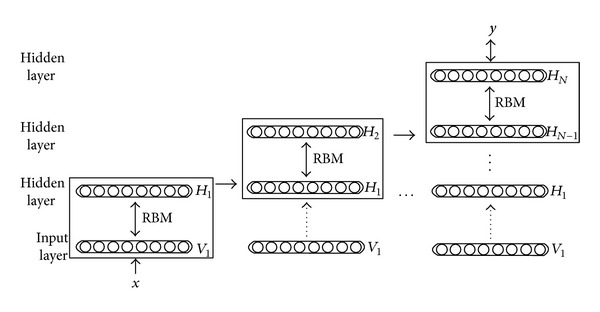
Deep Belief Networks consist of multiple layers, or to be prcise, a hierarchy of unsupervised Restricted Boltzmann Machines (RBMs) where the output of each RBM is used as input to the next.

Deep Belief Layer consists of 
<b>Input Layer</b> -
Input layer in DBN is also called visible layer. This layer contains an input node for each of the entries in our feature vector.

For example, in the MNIST dataset each image is 28 x 28 pixels. If we use the raw pixel intensities for the images, our feature vector would be of length 28 x 28 = 784, thus there would be 784 nodes in the input layer.

<b>Hidden Layers</b> - The output of input layer is then passed on to series of Hidden Layers. Each Hidden layer is nothing but an unsupervised RBM(restricted Boltzmann Machine).The output of each RBM in the hidden layer sequence is used as input to the next.

The final hidden layer connects to an output layer.

<b>Output Layer</b> - This layer contains the output probabilities for each class label. For example, in our MNIST dataset we have 10 possible class labels (one for each of the digits 1-9). The output node that produces the largest probability is chosen as the overall classification.

## Install the nolearn deep learning python library
Run the following cell to install the nolearn deep learning Python library in your notebook environment . Then, import the libraries that you will be using for this notebook.

In [31]:
#!pip install --user nolearn

In [10]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import zero_one_loss
from sklearn import datasets
from nolearn.dbn import DBN
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Loading MNIST data set of handwritten digits images

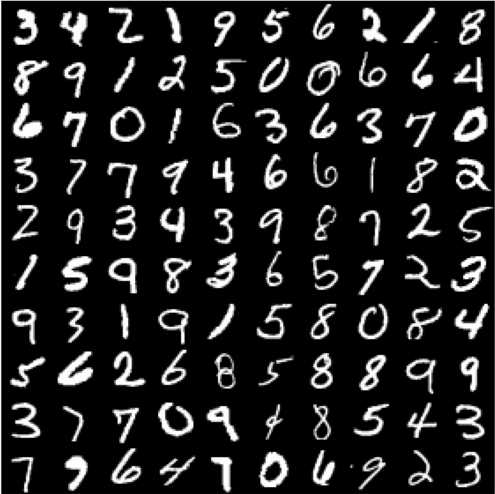

MNIST is a database of handwritten numbers.You can also refer to the <a href="http://yann.lecun.com/exdb/mnist/">link</a> to view and read about MNIST datatset. Since MNIST uses real-world data, it is an ideal database for training neural networks and machine learning tools that use pattern recognition.
Run the following cell to get the MNIST data set of images of handwritten numbers:



In [3]:
mnist = datasets.fetch_mldata("MNIST Original")

## Split images into training and testing datasets
For the function train_test_split(),

The first argument we specify is the data itself, which we scale to be in range [0, 1.0]. <b>The Deep Belief Network assumes that our data is scaled in the range [0, 1.0] so this is a necessary step.</b>

We then specify the “class labels” for each feature vector as the second argument.

The last argument defines the size of testing set

In [4]:
train_X, test_X, train_Y, test_Y = train_test_split(mnist.data / 255.0, mnist.target.astype("int0"), test_size = 0.33)
print "Number of images for training:", train_X.shape[0]
print "Number of images used for testing:", train_Y.shape[0]
pix = int(np.sqrt(test_X.shape[1]))
print "Each image is:", pix, "by", pix, "pixels"

Number of images for training: 46900
Number of images used for testing: 46900
Each image is: 28 by 28 pixels


In [5]:
print "Number of images for training:", train_X.shape[1]
print "Number of images used for testing:", train_Y.shape[0]

Number of images for training: 784
Number of images used for testing: 46900


## Training DBN model with the Deep Belief Network solver


### Description of DBN function paramenters(Setting Hyperparameters)
We can tune the hyperparameters in order to achieve the best accuracy.
Details about the hyper parameters are given below.

<b>learn_rates</b> - Learning rate is the size of the adjustments made to the weights with each iteration. A high learning rate makes a net traverse the errorscape quickly, but also makes it prone to overshoot the point of minimum error. A low learning rate is more likely to find the minimum, but it will do so very slowly, because it is taking small steps in adjusting the weights.

<b>learn_rate_decays</b>- The number with which the learn_rate is multiplied after each epoch of fine-tuning.

<b>epochs</b> - Number of ieterations to train the model with back propagation

<b>verbose</b> - For debugging the outputverbose is set to 1 else it is 0

<b>output_act_funct</b> - Output activation function. In this case softmax function is used as activation function.Softmax activation function in the output layer of a deep neural net to represent a categorical distribution over class labels, and obtaining the probabilities of each input element belonging to a label.


Approximately 47k images are used for training the model with 784 pixels

300 hidden units are used in the model

10 output units corresponding to each of the numerical digits: 0, 1, 2, ..., 9

In [20]:
deepbeliefnetwork = DBN(
    [train_X.shape[1], 500, 10], 
    learn_rates = 0.3,
    learn_rate_decays = 0.9,
    output_act_funct = "Softmax",
    epochs = 70, 
    verbose = 1) # set verbose to 0 for not printing output
deepbeliefnetwork.fit(train_X, train_Y)

[DBN] fitting X.shape=(46900, 784)
[DBN] layers [784, 500, 10]
[DBN] Fine-tune...


100%


Epoch 1:
  loss 2.31216651266
  err  0.900401297814
  (0:00:08)


100%


Epoch 2:
  loss 2.30324093989
  err  0.899419398907
  (0:00:07)


100%


Epoch 3:
  loss 2.30304425401
  err  0.900251878415
  (0:00:06)


100%


Epoch 4:
  loss 2.30303277963
  err  0.902066256831
  (0:00:07)


100%


Epoch 5:
  loss 2.30293188948
  err  0.901297814208
  (0:00:05)


100%


Epoch 6:
  loss 2.30285944867
  err  0.901852800546
  (0:00:05)


100%


Epoch 7:
  loss 2.30288923927
  err  0.90315488388
  (0:00:05)


100%


Epoch 8:
  loss 2.30284787332
  err  0.902108948087
  (0:00:05)


100%


Epoch 9:
  loss 2.30280841146
  err  0.900102459016
  (0:00:05)


100%


Epoch 10:
  loss 2.30279551797
  err  0.901980874317
  (0:13:36)


100%


Epoch 11:
  loss 2.30277743203
  err  0.902407786885
  (0:00:06)


100%


Epoch 12:
  loss 2.3027358687
  err  0.902621243169
  (0:00:17)


100%


Epoch 13:
  loss 2.30274998393
  err  0.901340505464
  (0:00:06)


100%


Epoch 14:
  loss 2.30277267929
  err  0.900465334699
  (0:01:30)


100%


Epoch 15:
  loss 2.30273760179
  err  0.900870901639
  (0:00:06)


100%


Epoch 16:
  loss 2.30268939238
  err  0.901383196721
  (0:00:16)


100%


Epoch 17:
  loss 2.3027046958
  err  0.901169740437
  (0:00:06)


100%


Epoch 18:
  loss 2.30275975648
  err  0.899419398907
  (0:01:12)


100%


Epoch 19:
  loss 2.30270165107
  err  0.897199453552
  (0:00:06)


100%


Epoch 20:
  loss 2.30315610229
  err  0.901703381148
  (0:00:16)


100%


Epoch 21:
  loss 2.30417977852
  err  0.897925204918
  (0:00:06)


100%


Epoch 22:
  loss 2.30798769388
  err  0.898053278689
  (0:00:07)


100%


Epoch 23:
  loss 2.35933917435
  err  0.899291325137
  (0:05:04)


100%


Epoch 24:
  loss 2.60932650006
  err  0.902407786885
  (-1 day, 23:59:58)


100%


Epoch 25:
  loss 3.04495765668
  err  0.898330771858
  (0:00:06)


100%


Epoch 26:
  loss 3.45196253517
  err  0.900913592896
  (0:00:06)


100%


Epoch 27:
  loss 4.82946096743
  err  0.902407786885
  (0:00:05)


100%


Epoch 28:
  loss 4.43120810471
  err  0.900636099727
  (0:00:05)


100%


Epoch 29:
  loss 4.31189770321
  err  0.898330771858
  (0:00:05)


100%


Epoch 30:
  loss 4.92622362134
  err  0.901682035519
  (0:00:06)


100%


Epoch 31:
  loss 8.322406561
  err  0.903624487705
  (0:00:05)


100%


Epoch 32:
  loss 6.38175966473
  err  0.903773907104
  (0:00:05)


100%


Epoch 33:
  loss 6.52937902095
  err  0.901041666667
  (0:00:05)


100%


Epoch 34:
  loss 10.2950320684
  err  0.904008709016
  (0:00:05)


100%


Epoch 35:
  loss 9.56234060643
  err  0.901639344262
  (0:00:05)


100%


Epoch 36:
  loss 14.1503803763
  err  0.90287739071
  (0:00:05)


100%


Epoch 37:
  loss 11.6006768948
  err  0.901852800546
  (0:00:05)


100%


Epoch 38:
  loss 25.6346736508
  err  0.90234375
  (0:00:05)


100%


Epoch 39:
  loss 23.815990049
  err  0.901020321038
  (0:00:05)


100%


Epoch 40:
  loss 29.6107351063
  err  0.904307547814
  (0:00:06)


100%


Epoch 41:
  loss 21.1258838939
  err  0.900251878415
  (0:00:07)


100%


Epoch 42:
  loss 35.4733066409
  err  0.903325648907
  (0:00:07)


100%


Epoch 43:
  loss 31.432884514
  err  0.902984118852
  (0:00:06)


100%


Epoch 44:
  loss 17.9560715901
  err  0.901660689891
  (0:00:05)


100%


Epoch 45:
  loss 27.9195817246
  err  0.901959528689
  (0:00:06)


100%


Epoch 46:
  loss 19.102489317
  err  0.90153261612
  (0:00:05)


100%


Epoch 47:
  loss 30.4602002941
  err  0.904414275956
  (0:00:05)


100%


Epoch 48:
  loss 37.129381699
  err  0.901767418033
  (0:00:06)


100%


Epoch 49:
  loss 45.1986592037
  err  0.902386441257
  (0:00:05)


100%


Epoch 50:
  loss 39.9526641134
  err  0.904243510929
  (0:00:06)


100%


Epoch 51:
  loss 39.2461579654
  err  0.903539105191
  (0:00:06)


100%


Epoch 52:
  loss 27.945168987
  err  0.904158128415
  (0:00:06)


100%


Epoch 53:
  loss 31.2130519562
  err  0.903731215847
  (0:00:06)


100%


Epoch 54:
  loss 27.6110823962
  err  0.903176229508
  (0:00:05)


100%


Epoch 55:
  loss 26.2047364197
  err  0.900038422131
  (0:00:05)


100%


Epoch 56:
  loss 21.0891845396
  err  0.901639344262
  (0:00:05)


100%


Epoch 57:
  loss 20.5802707184
  err  0.899974385246
  (0:00:05)


100%


Epoch 58:
  loss 23.1065980391
  err  0.901148394809
  (0:00:05)


100%


Epoch 59:
  loss 23.7448316754
  err  0.902898736339
  (0:00:05)


100%


Epoch 60:
  loss 22.7737693467
  err  0.903069501366
  (0:00:05)


100%


Epoch 61:
  loss 21.6162747106
  err  0.903346994536
  (0:00:05)


100%


Epoch 62:
  loss 19.5058474919
  err  0.903069501366
  (0:00:05)


100%


Epoch 63:
  loss 19.38362716
  err  0.90368852459
  (0:00:05)


100%


Epoch 64:
  loss 20.3257981324
  err  0.90221567623
  (0:00:05)


100%


Epoch 65:
  loss 19.0959198748
  err  0.900102459016
  (0:00:05)


100%


Epoch 66:
  loss 17.3555183736
  err  0.901383196721
  (0:00:05)


100%


Epoch 67:
  loss 15.2833339236
  err  0.903795252732
  (0:00:05)


100%


Epoch 68:
  loss 13.8612599894
  err  0.90328295765
  (0:00:05)


100%


Epoch 69:
  loss 12.351425309
  err  0.904222165301
  (0:00:05)


100%


Epoch 70:
  loss 10.8654685431
  err  0.902322404372
  (0:00:05)


## Evaluating predictions for each digit
predict() takes the testing data and makes predictions regarding which digit each image contains.

In [21]:
y_prediction = deepbeliefnetwork.predict(test_X)
print "Accuracy:", zero_one_loss(test_Y, y_prediction)

Accuracy: 0.9065800865800866


## The accuracy  predicted was 90.65%

## Randomly selecting few test images and evaluating its predictions

Actual digit is 7 predicted 6


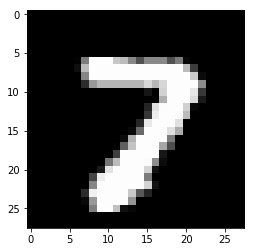

In [22]:
def randomIm():
    i = np.random.choice(np.arange(0, len(test_Y)), size = (1,))
    prediction = deepbeliefnetwork.predict(np.atleast_2d(test_X[i]))
    image = (test_X[i] * 255).reshape((28, 28)).astype("uint8")
    # show the prediction
    print "Actual digit is", test_Y[i][0], "predicted", prediction[0]
    imgplot = plt.imshow(image)
    imgplot.set_cmap('gray')   

randomIm() 

Actual digit is 3 predicted 6


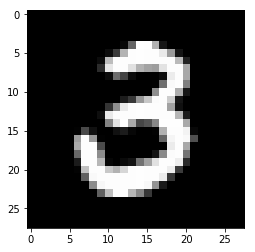

In [27]:
randomIm()

Actual digit is 6 predicted 6


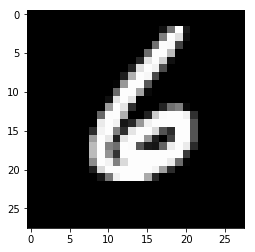

In [28]:
randomIm()

Actual digit is 6 predicted 6


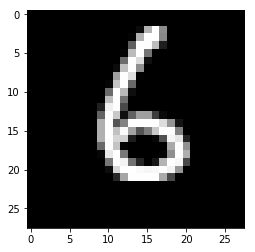

In [29]:
randomIm()

Actual digit is 8 predicted 6


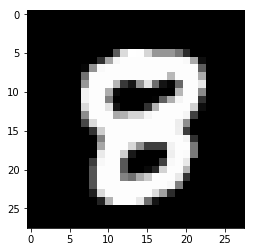

In [30]:
randomIm()

# Licenses

<a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/3.0/us/88x31.png" /></a><br>The text in the document by SHWETA TATIYA and RADHIKA GATHIA is licensed under <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/">Creative Commons Attribution 3.0 United States License</a>.<br><br>


The code in the document by SHWETA TATIYA and RADHIKA GATHIA is licensed under the MIT License https://opensource.org/licenses/MIT

# References

In [ ]:
# Dataset 
#http://yann.lecun.com/exdb/mnist/

# References

# https://github.com/nikbearbrown/NEU_COE
# MIT 6.S191: Introduction to Deep Learning https://youtu.be/JN6H4rQvwgY
# https://youtu.be/v5JvvbP0d44
# https://youtu.be/ixF5WNpTzCA
# https://youtu.be/jajksuQW4mc